# Forward Selection

In [1]:
require('leaps')

Loading required package: leaps

Warning message:
“package ‘leaps’ was built under R version 4.0.1”


In [2]:
require('ISLR')

Loading required package: ISLR



In [4]:
require('Hmisc')

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




In [5]:
describe(Hitters)

Hitters 

 20  Variables      322  Observations
--------------------------------------------------------------------------------
AtBat 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     322        0      247        1    380.9    176.2    161.0    194.1 
     .25      .50      .75      .90      .95 
   255.2    379.5    512.0    584.9    609.9 

lowest :  16  19  20  22  24, highest: 642 663 677 680 687
--------------------------------------------------------------------------------
Hits 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     322        0      144        1      101    52.95     39.0     45.1 
     .25      .50      .75      .90      .95 
    64.0     96.0    137.0    163.0    174.0 

lowest :   1   2   3   4   6, highest: 210 211 213 223 238
--------------------------------------------------------------------------------
HmRun 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     322        0   

In [120]:
#removing the missing rows here for the sake of only model selection method
#explaination
#However, we will need to do imputations for the real model building


Hitters1 = na.omit(Hitters)
with(Hitters1, sum(is.na(Hitters)))

[1] 0

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, method = "forward", 
    nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*

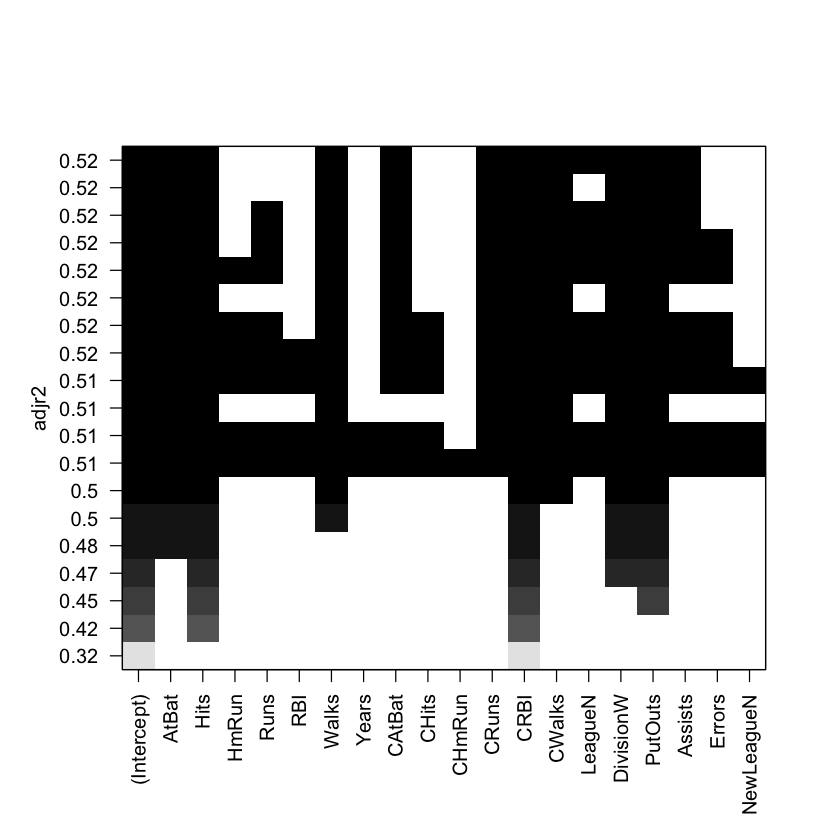

In [10]:
regfit.fwd = regsubsets(Salary~., data = Hitters, method = 'forward', nvmax = 19)
regfit.summary = summary(regfit.fwd)
plot(regfit.fwd, scale = 'adjr2')

[1] 10

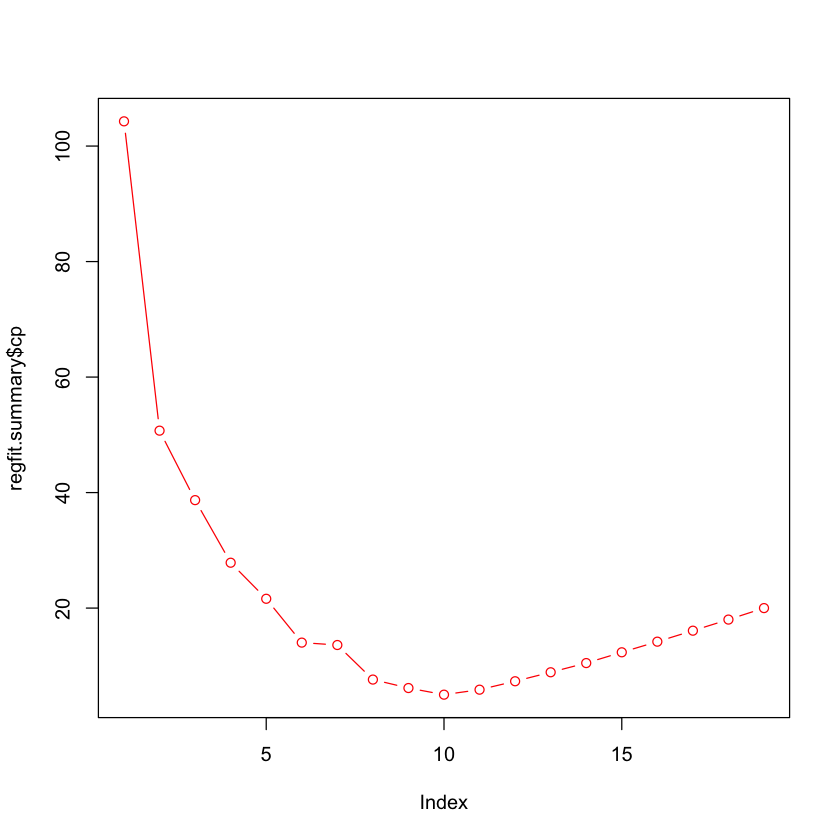

In [14]:
regfit.summary = summary(regfit.fwd)
plot(regfit.summary$cp, col = 'red', type = 'b')
which.min(regfit.summary$cp)

# Model Selection Using a Validation Set

In [16]:
dim = dim(Hitters)

In [153]:
set.seed(1)
train = sample(263, 180, replace = FALSE)

In [80]:
regfit.fwd$call

regsubsets.formula(Salary ~ ., data = Hitters[train, ], nvmax = 19, 
    method = "forward")

In [67]:
regfit.fwd = regsubsets(Salary~., data= Hitters[train,], nvmax=19, 
                        method = "forward")

In [68]:
val.errors = rep(NA, 19)

In [69]:
require('dplyr')

In [70]:
x.test = model.matrix(Salary~., data = Hitters[-train, ])

for(i in 1:19){
    coefi = coef(regfit.fwd, id = i)
    pred = x.test[, names(coefi)]%*%coefi #matrix multiplication
    val.errors[i] = mean((Hitters$Salary[-train]-pred)^2)
}

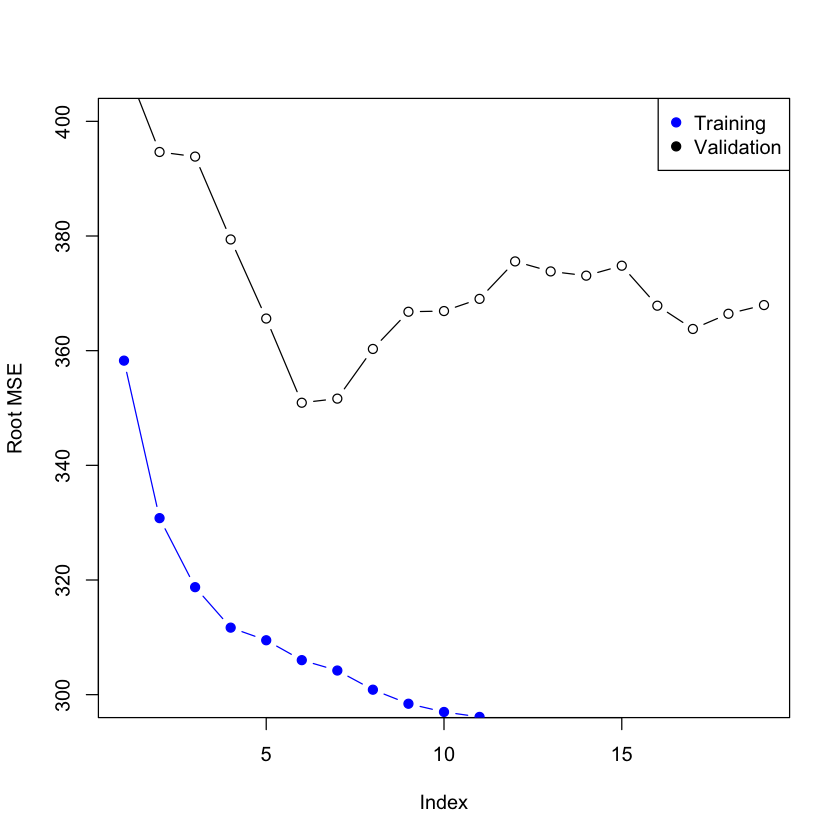

In [72]:
plot(sqrt(val.errors), type = 'b', ylim= c(300, 400), ylab = 'Root MSE')
points(sqrt(regfit.fwd$rss[-1]/180), col = 'blue', pch = 19, type = 'b')
legend("topright", legend = c('Training', 'Validation'), col = c('blue', 'black')
      , pch = 19)

In [74]:
sqrt(regfit.fwd$rss/180)

[1] 443.8946 358.2620 330.7916 318.7500 311.6902 309.4901 306.0212 304.2108
 [9] 300.8670 298.4182 296.9816 296.1201 294.9004 294.3127 293.6255 292.7611
[17] 292.1129 290.9287 290.7105 290.6580

In [75]:
predict.regsubsets = function(object, newdata, id, ...){
    form = as.formula(object$call[[2]])
    mat = model.matrix(form, newdata)
    coefi = coef(object, id = id)
    mat[, names(coefi)]%*%coefi
}

# Model Selection by Cross Validation

In [81]:
?sample

In [91]:
set.seed(1)
folds = sample(rep(1:10, length = nrow(Hitters)))

In [92]:
table(folds)

folds
 1  2  3  4  5  6  7  8  9 10 
27 27 27 26 26 26 26 26 26 26 

In [93]:
cv.errors = matrix(NA, 10, 19)

In [95]:
for(k in 1:10){
    best.fit = regsubsets(Salary~., data = Hitters[folds != k, ], nvmax=19,
                         method = 'forward')
    for(i in 1:19){
        pred = predict(best.fit, Hitters[folds==k, ], id = i)
        cv.errors[k, i] = mean((Hitters$Salary[folds==k]-pred)^2)
    }
}

In [99]:
rmse.cv = sqrt(apply(cv.errors, 2, mean))

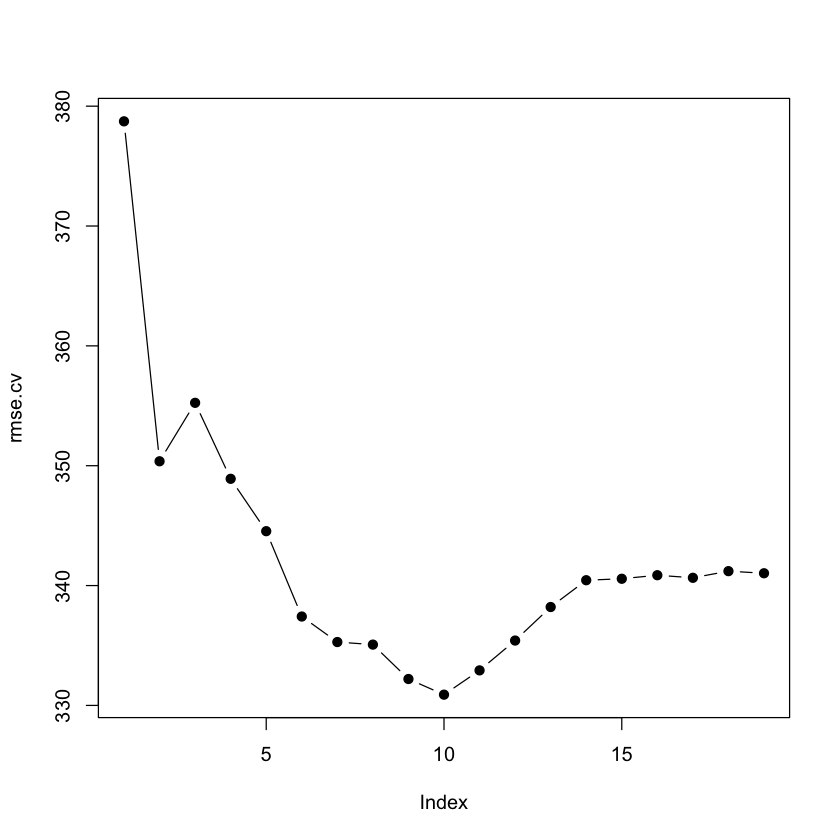

In [100]:
plot(rmse.cv, pch = 19, type = 'b')

# Ridge Regression and Lasso

In [104]:
install.packages('glmnet')

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’





The downloaded binary packages are in
	/var/folders/jj/zsx33fbn3hzc62z4n024brl80000gn/T//RtmpiktbdZ/downloaded_packages


In [105]:
require('glmnet')

Loading required package: glmnet

Warning message:
“package ‘glmnet’ was built under R version 4.0.1”
Loading required package: Matrix

Loaded glmnet 4.0-2



In [121]:
x = model.matrix(Salary~., data = Hitters1)

In [122]:
y = Hitters1$Salary

In [108]:
fit.ridge = glmnet(x,y, alpha = 0)

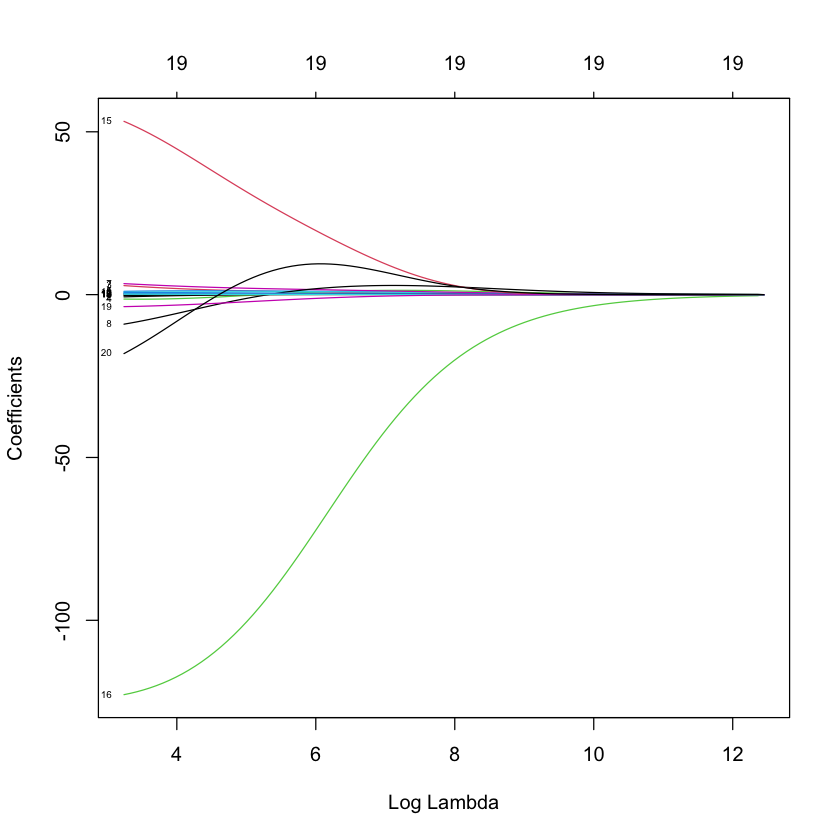

In [110]:
plot(fit.ridge, xvar = 'lambda', label = TRUE)

In [111]:
cv.ridge = cv.glmnet(x, y, alpha = 0)

In [112]:
cv.ridge


Call:  cv.glmnet(x = x, y = y, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Measure    SE Nonzero
min     26  114786 25189      19
1se   3221  139209 22573      19

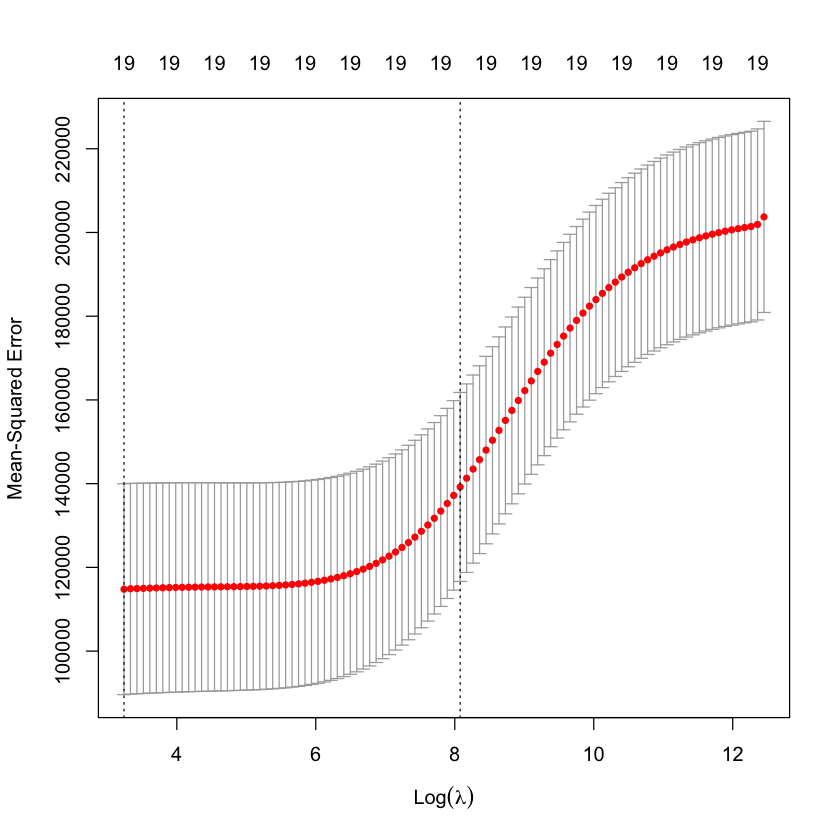

In [115]:
plot(cv.ridge)

In [154]:
fit.lasso = glmnet(x, y)

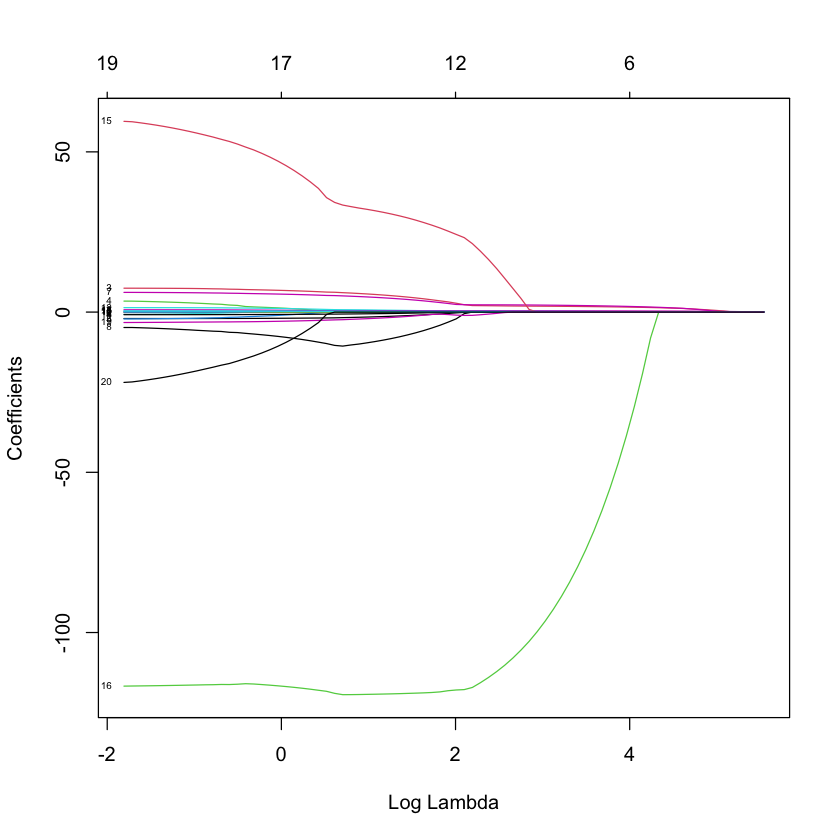

In [155]:
plot(fit.lasso, xvar = "lambda", label = TRUE)

In [156]:
cv.lasso = cv.glmnet(x,y)

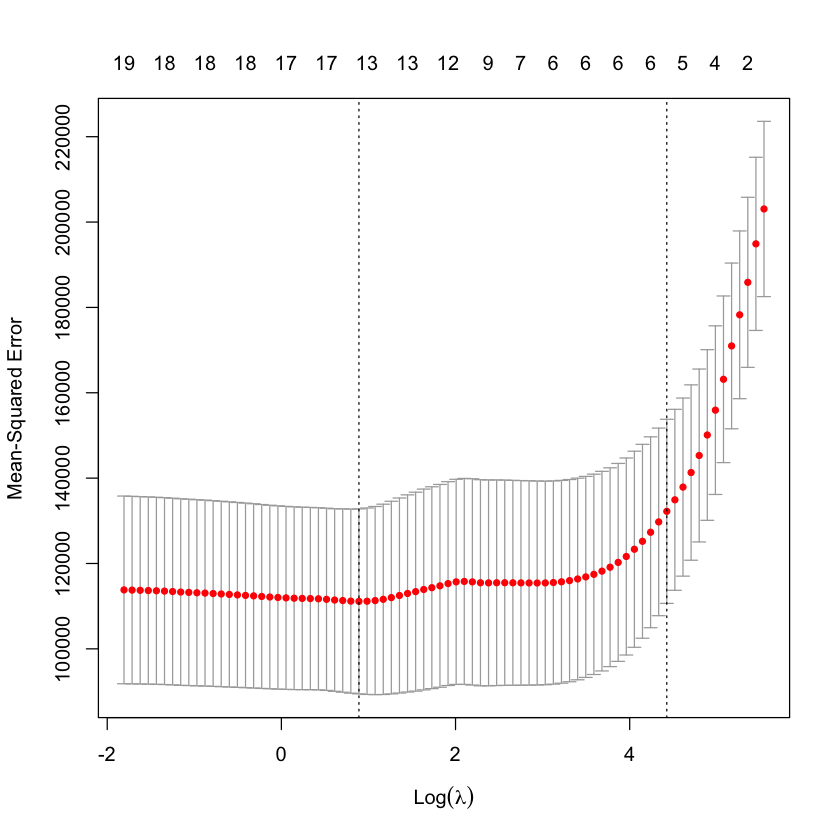

In [157]:
plot(cv.lasso)

In [158]:
coef(cv.lasso)

21 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) 167.91202846
(Intercept)   .         
AtBat         .         
Hits          1.29269756
HmRun         .         
Runs          .         
RBI           .         
Walks         1.39817511
Years         .         
CAtBat        .         
CHits         .         
CHmRun        .         
CRuns         0.14167760
CRBI          0.32192558
CWalks        .         
LeagueN       .         
DivisionW     .         
PutOuts       0.04675463
Assists       .         
Errors        .         
NewLeagueN    .         

In [159]:
lasso.tr = glmnet(x[train, ], y[train])

In [160]:
lasso.tr


Call:  glmnet(x = x[train, ], y = y[train]) 

   Df  %Dev  Lambda
1   0  0.00 262.100
2   1  5.92 238.800
3   1 10.83 217.600
4   1 14.91 198.300
5   2 19.72 180.600
6   3 23.94 164.600
7   3 27.45 150.000
8   3 30.37 136.700
9   3 32.79 124.500
10  3 34.80 113.500
11  4 36.50 103.400
12  5 38.77  94.190
13  6 40.90  85.820
14  6 42.73  78.200
15  6 44.25  71.250
16  6 45.51  64.920
17  6 46.55  59.150
18  6 47.42  53.900
19  6 48.14  49.110
20  6 48.74  44.750
21  6 49.24  40.770
22  6 49.65  37.150
23  6 49.99  33.850
24  7 50.28  30.840
25  7 50.51  28.100
26  8 50.71  25.610
27  8 50.94  23.330
28  8 51.12  21.260
29  8 51.28  19.370
30  8 51.41  17.650
31  8 51.52  16.080
32  8 51.60  14.650
33  8 51.68  13.350
34  9 51.75  12.170
35  9 51.99  11.080
36 10 52.23  10.100
37 10 52.44   9.202
38 11 52.64   8.385
39 11 52.82   7.640
40 11 52.97   6.961
41 11 53.09   6.343
42 11 53.19   5.779
43 12 53.28   5.266
44 14 53.53   4.798
45 14 53.83   4.372
46 15 54.06   3.984
47 16 54.45  

In [161]:
pred = predict(lasso.tr, x[-train,])

In [162]:
dim(pred)

[1] 83 83

In [163]:
rmse = sqrt(apply((y[-train]-pred)^2, 2, mean))

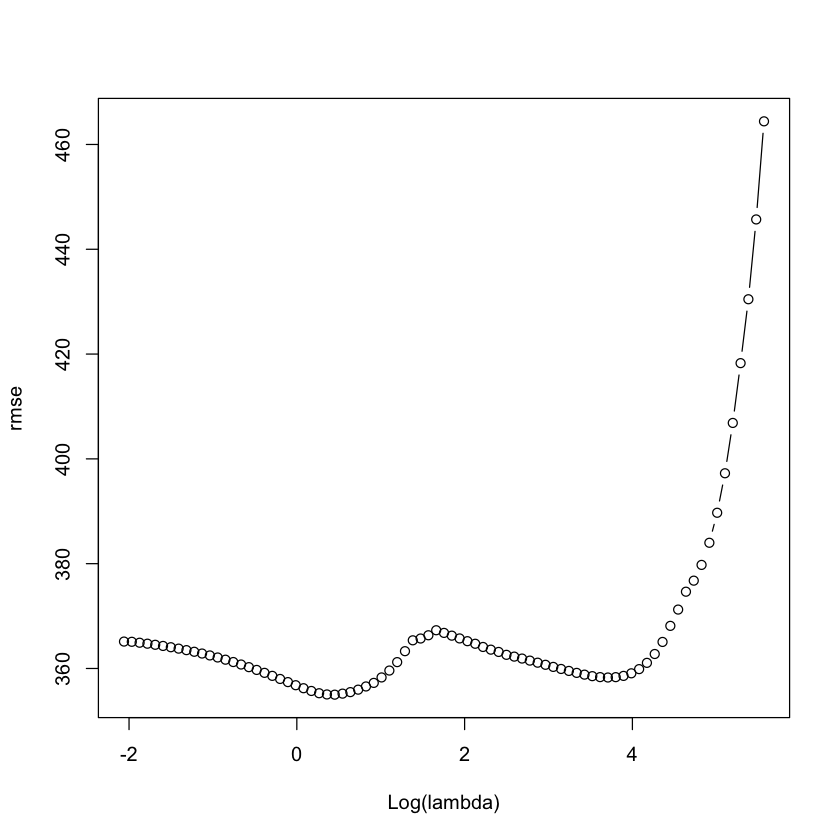

In [164]:
plot(log(lasso.tr$lambda), rmse, type = 'b', xlab = 'Log(lambda)')

In [165]:
lam.best = lasso.tr$lambda[order(rmse)[1]-1]

In [166]:
lam.best


[1] 1.724372

In [167]:
coef(lasso.tr, s = lam.best)


21 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  1.904554e+02
(Intercept)  .           
AtBat       -1.115803e+00
Hits         4.795055e+00
HmRun        .           
Runs        -3.296373e+00
RBI          3.263343e-01
Walks        5.923387e+00
Years       -2.126114e+01
CAtBat      -3.579409e-03
CHits        5.746711e-02
CHmRun       5.290527e-01
CRuns        7.071538e-01
CRBI         4.846916e-01
CWalks      -4.508670e-01
LeagueN      8.725435e+01
DivisionW   -1.618762e+02
PutOuts      2.856306e-01
Assists      2.802735e-01
Errors      -4.683571e+00
NewLeagueN  -5.290119e+01

In [140]:
lasso.tr$lambda[56]

[1] 1.571184

In [169]:
cv.lasso$

cv.glmnet(x = x, y = y)